### Linear Regression

In [706]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 


In [707]:
df = pd.read_csv('SOCR-HeightWeight.csv')

In [708]:
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [709]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [710]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [711]:
df.drop('Index' , axis = 1 , inplace = True)

In [712]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


Text(0, 0.5, 'Height')

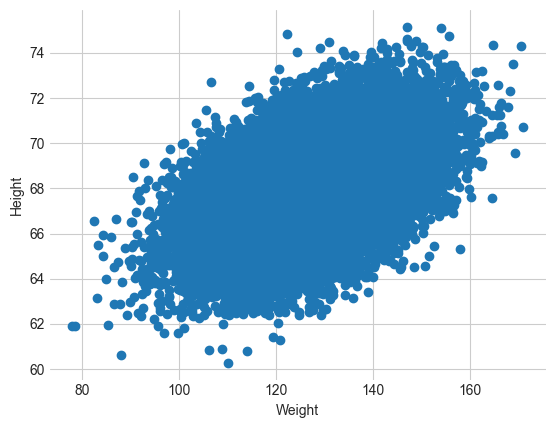

In [713]:
## Scatter plot

plt.scatter(df['Weight(Pounds)'],df['Height(Inches)'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [714]:
df.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


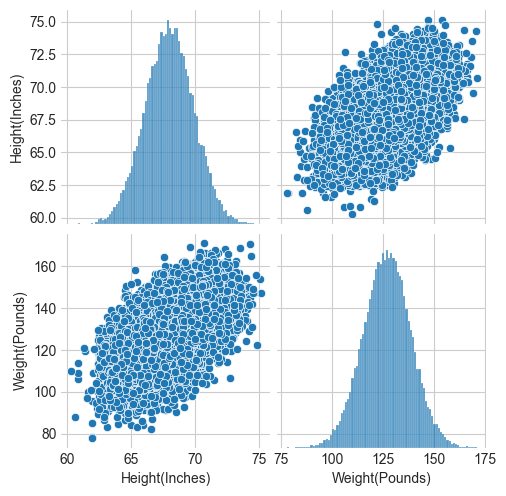

In [715]:
## Seaborn visualization

import seaborn as sns
sns.pairplot(df)


In [716]:
## independent and dependent features

X = df[['Weight(Pounds)']]     ## Independent in train (datadrame or 2d array)  
y = df['Height(Inches)']   ## This variable can be seriees or 1d array


In [717]:
X_series = df['Weight(Pounds)']
np.array(X_series).shape

(25000,)

In [718]:
np.array(y).shape

(25000,)

In [719]:
## Train  Test Split 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [720]:
X_train.shape

(18750, 1)

In [721]:
## Standardize 

from sklearn.preprocessing import StandardScaler


In [722]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)

In [723]:
## for train - fit_transform
## for test - transform (not to be shown)

X_test = scaler.transform(X_test)

In [724]:
X_test

array([[ 0.62053543],
       [-1.29869704],
       [ 0.76685832],
       ...,
       [ 0.73940988],
       [-1.16790419],
       [ 0.00246396]], shape=(6250, 1))

In [725]:
## Apply for LR 

from sklearn.linear_model import LinearRegression



In [726]:
regression = LinearRegression(n_jobs=-1)

In [727]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [728]:
print("Coefficient or slope : " ,regression.coef_)
print("Intercept : " ,regression.intercept_)

Coefficient or slope :  [0.94883892]
Intercept :  67.9938252704


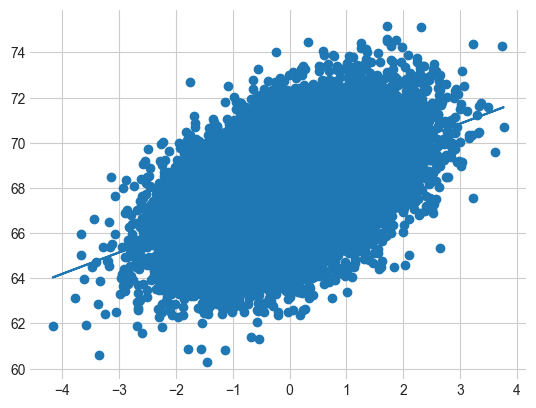

In [729]:
## plot train dataset best fit line


plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

##### prediction of test data

###### 1.predicated height output = intercept + coef_(Weights)
###### 2.y_pred_test = 156.470 + 17.29(X_test)

In [730]:
## Prediction For test data

y_pred = regression.predict(X_test)

In [731]:
## Performance metrics 


from sklearn.metrics import mean_squared_error ,mean_absolute_error

In [732]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse  = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.7333807993730996
1.3166150322297803
1.6532939240719116


In [733]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print(score)

0.2592643941428425


In [734]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.25914583850810224

In [735]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [736]:
import statsmodels.api as sm

In [737]:
model = sm.OLS(y_train,X_train).fit()

In [738]:
prediction =model.predict(X_test)
print(prediction)

[ 0.58878817 -1.2322543   0.72762503 ...  0.70158088 -1.10815295
  0.0023379 ]


In [739]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:         Height(Inches)   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              3.649
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                      0.0561
Time:                        01:08:09   Log-Likelihood:                     -1.0572e+05
No. Observations:               18750   AIC:                                  2.115e+05
Df Residuals:                   18749   BIC:                                  2.115e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [740]:
## Prediction for new data

regression.predict(scaler.transform([[72]]))

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([63.50061832])

##### Multiple Linear Regression

In [741]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [742]:
df_index = pd.read_csv('economic_index.csv')

In [743]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [744]:
## Droping the unncessary columns

df_index.drop(columns = ['Unnamed: 0' ,'year','month'],axis = 1 ,inplace = True )

In [745]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [746]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

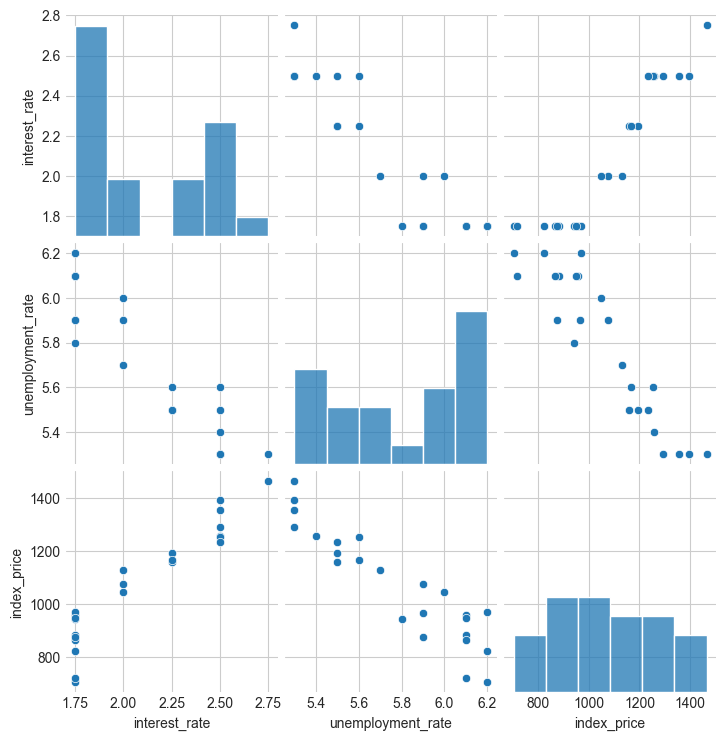

In [747]:
###  seaborn 
import seaborn as sns
sns.pairplot(df_index)

In [748]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

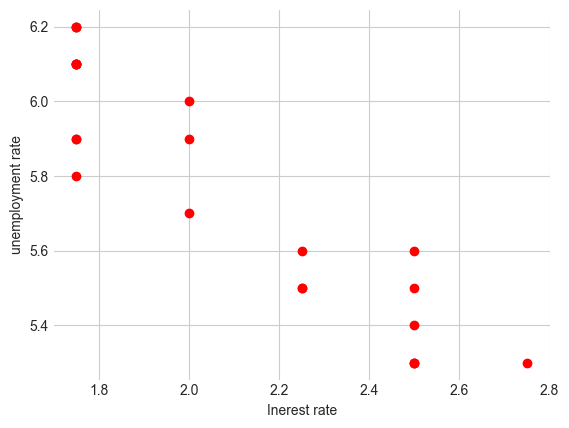

In [749]:
plt.scatter(df_index['interest_rate'] ,df_index['unemployment_rate'],color='r')
plt.xlabel('Inerest rate')
plt.ylabel('unemployment rate')

In [750]:
df_index.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   interest_rate      24 non-null     float64
 1   unemployment_rate  24 non-null     float64
 2   index_price        24 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 708.0 bytes


In [751]:
# independent and dependent variable 

X = df_index[['interest_rate','unemployment_rate']]
y = df_index['index_price']

In [752]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [753]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [754]:
## Train

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25 , random_state=42)

In [755]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [756]:
from sklearn.linear_model import LinearRegression

In [757]:
regression = LinearRegression()

In [758]:
regression.fit(X_train,y_train)

LinearRegression()

In [759]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=3)

In [760]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [761]:
regression.predict(X_train)

array([ 929.82565018, 1341.42873089,  821.65051903, 1233.25359973,
       1341.42873089,  958.85154593,  857.70889608, 1341.42873089,
       1305.37035383,  821.65051903,  857.70889608,  929.82565018,
        857.70889608, 1204.22770398, 1067.02667708,  965.88402724,
        857.70889608, 1269.31197678])

In [762]:
y_pred = regression.predict(X_test)

In [763]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [764]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


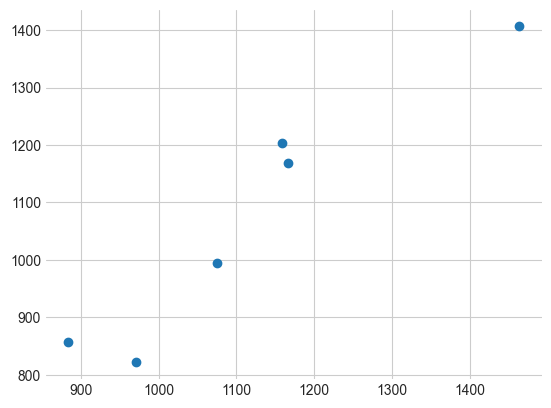

In [765]:
## Assumptions
plt.scatter(y_test,y_pred)

In [766]:
resuiduals = y_test - y_pred
print(resuiduals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


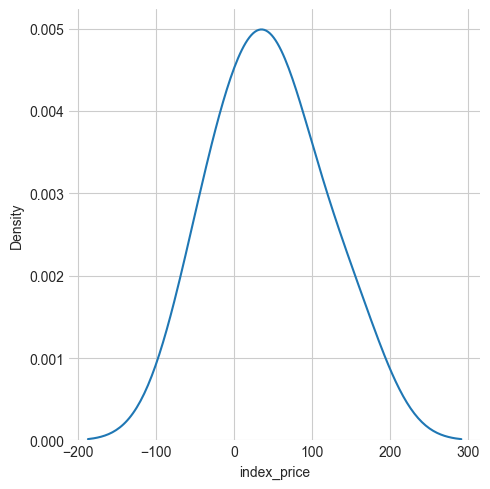

In [767]:
sns.displot(resuiduals,kind = 'kde')

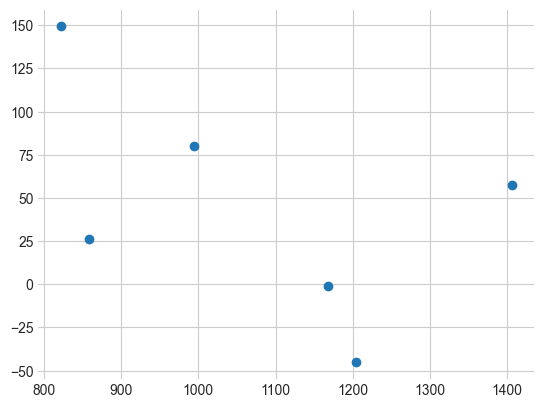

In [768]:
## Scattee plot 

plt.scatter(y_pred,resuiduals)

In [769]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [770]:
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [771]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 09 Dec 2024   Prob (F-statistic):                       0.754
Time:                        01:08:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\Lenovo\new\Data-Science-Course\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [772]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [773]:
print(regression.intercept_)

1053.4444444444443


### Polynomial Regression


In [774]:
import numpy as np 

import pandas  as pd 

import matplotlib.pyplot  as plt

%matplotlib inline

Text(0, 0.5, 'Y dataset')

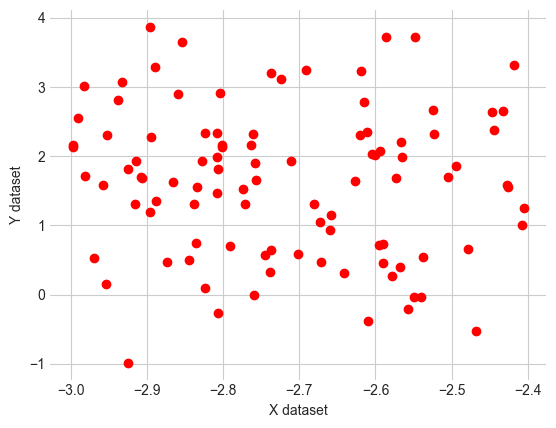

In [775]:
X = 0.6 * np.random.rand(100,1) - 3 
y = 0.5 * X **2 +1.5*X+2+np.random.randn(100,1)
## quadratic equation used = y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y, color = 'r')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')


In [776]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42 )


In [777]:
## let simple linear regression

from sklearn.linear_model import LinearRegression

regression_1 = LinearRegression()

In [778]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [779]:
from sklearn.metrics import r2_score
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

0.018984416423549644


Text(0, 0.5, 'Ylabel')

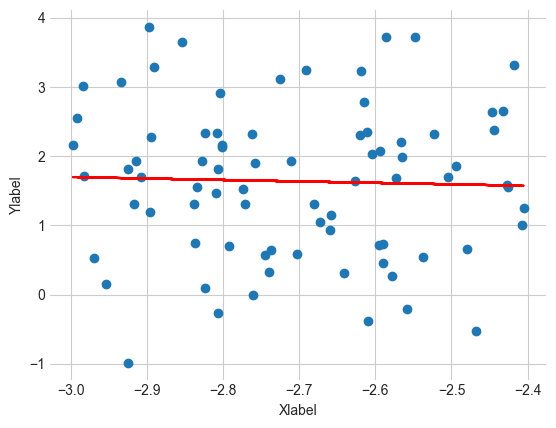

In [780]:
## Lets Visualize this 
plt.plot(X_train,regression_1.predict(X_train),color = 'r')
plt.scatter(X_train,y_train)
plt.xlabel("Xlabel")
plt.ylabel("Ylabel")


In [781]:
## lets apply polynomial transformation

from sklearn.preprocessing import PolynomialFeatures

In [782]:
poly = PolynomialFeatures(degree = 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [783]:
X_train_poly

array([[ 1.        , -2.71075463,  7.34819067],
       [ 1.        , -2.702503  ,  7.30352249],
       [ 1.        , -2.75815823,  7.60743682],
       [ 1.        , -2.8537989 ,  8.14416816],
       [ 1.        , -2.44383147,  5.97231224],
       [ 1.        , -2.40796623,  5.79830134],
       [ 1.        , -2.80135451,  7.84758712],
       [ 1.        , -2.61990015,  6.86387678],
       [ 1.        , -2.58591804,  6.68697209],
       [ 1.        , -2.60483824,  6.78518226],
       [ 1.        , -2.59520821,  6.73510566],
       [ 1.        , -2.40511443,  5.7845754 ],
       [ 1.        , -2.41754661,  5.84453162],
       [ 1.        , -2.59396136,  6.72863555],
       [ 1.        , -2.91425232,  8.49286658],
       [ 1.        , -2.92504814,  8.55590663],
       [ 1.        , -2.82801557,  7.99767207],
       [ 1.        , -2.42560014,  5.88353602],
       [ 1.        , -2.91663204,  8.50674244],
       [ 1.        , -2.80661899,  7.87711017],
       [ 1.        , -2.61073154,  6.815

In [784]:
X_test_poly

array([[ 1.        , -2.75726682,  7.60252032],
       [ 1.        , -2.67155331,  7.13719708],
       [ 1.        , -2.888878  ,  8.34561608],
       [ 1.        , -2.93891766,  8.63723699],
       [ 1.        , -2.95773302,  8.74818464],
       [ 1.        , -2.87468767,  8.26382919],
       [ 1.        , -2.73734746,  7.49307113],
       [ 1.        , -2.6006142 ,  6.76319419],
       [ 1.        , -2.76380413,  7.63861326],
       [ 1.        , -2.54882148,  6.49649092],
       [ 1.        , -2.52480483,  6.37463942],
       [ 1.        , -2.80818698,  7.8859141 ],
       [ 1.        , -2.86619304,  8.21506257],
       [ 1.        , -2.99782854,  8.98697593],
       [ 1.        , -2.95341338,  8.72265058],
       [ 1.        , -2.54035494,  6.45340321],
       [ 1.        , -2.90694425,  8.45032487],
       [ 1.        , -2.56826162,  6.59596775],
       [ 1.        , -2.84493387,  8.09364872],
       [ 1.        , -2.85905892,  8.1742179 ]])

In [785]:
regression = LinearRegression()

In [786]:
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.04019244577119352


In [787]:
print(regression.intercept_)

[33.32489798]


In [788]:
print(regression.coef_)

[[ 0.         23.77866139  4.44296595]]


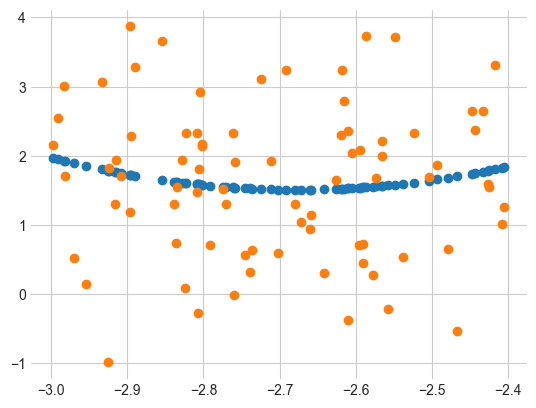

In [789]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [790]:
## Prediction of new data set

X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

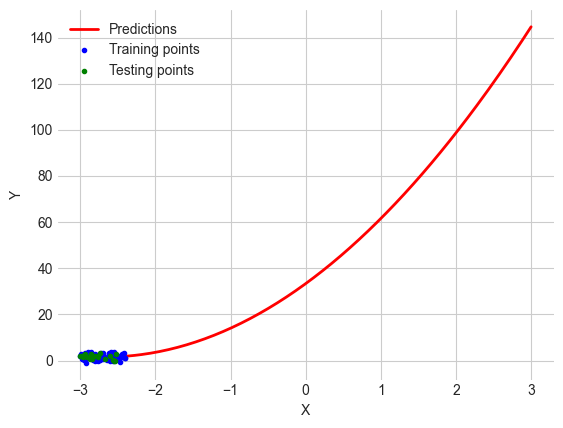

In [791]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new ,"r-" , linewidth = 2 , label = "Predictions")
plt.plot(X_train,y_train,"b.",label = 'Training points')
plt.plot(X_test,y_test,"g." , label = 'Testing points')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Pipeline Concept

In [792]:
from sklearn.pipeline import Pipeline

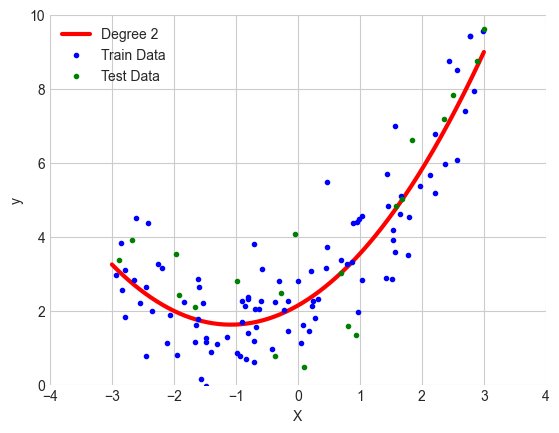

In [793]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Example data
X_train = np.random.rand(100, 1) * 6 - 3  # Training data
y_train = 0.5 * X_train**2 + X_train + 2 + np.random.randn(100, 1)  # Quadratic with noise
X_test = np.random.rand(20, 1) * 6 - 3  # Test data
y_test = 0.5 * X_test**2 + X_test + 2 + np.random.randn(20, 1)  # Quadratic with noise

def poly_regression(degree):
    # Generate new data for predictions
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)

    # Define the pipeline
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    # Fit the model
    poly_regression.fit(X_train, y_train)

    # Predict with the model
    y_pred_new = poly_regression.predict(X_new)

    # Plot the prediction line
    plt.plot(X_new, y_pred_new, 'r', label=f"Degree {degree}", linewidth=3)
    plt.plot(X_train, y_train, "b.", label="Train Data")
    plt.plot(X_test, y_test, "g.", label="Test Data")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

# Call the function with a desired degree
poly_regression(degree=2)


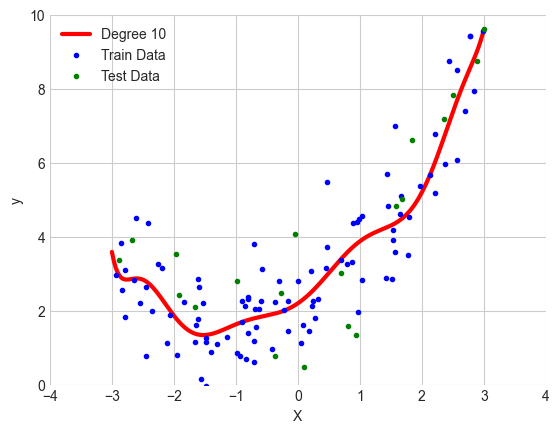

In [794]:
poly_regression(10)

##### Ridge Regression , Lasso Regression , ElasticNet Regression

In [795]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [796]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv'  , header = 1)

In [797]:
dataset.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [798]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [799]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [800]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


### Data Cleaning

In [801]:
##   missing values

dataset[dataset.isnull().any(axis = 1)]



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [802]:
dataset.loc[:122,"Region"] = 0
dataset.loc[122:,"Region"] = 1
df = dataset

In [803]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [804]:
df[['Region']] = df[['Region']].astype(int)

In [805]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [806]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [807]:
##    Removing  the null values 

df=df.dropna().reset_index(drop = True)

In [808]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [809]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [810]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [811]:
## Remove the 122 row 
df =df.drop(122).reset_index(drop= True )

In [812]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [813]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [814]:
## fix spaces in  columns names 
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [816]:
## Changes the required columns as integer data type 

In [817]:
df[['month' , 'day','year','Temperature','RH','Ws']] = df[['month' , 'day','year','Temperature','RH','Ws']] .astype(int)

In [818]:
## changing the otether to float 


objects =[features for features in df.columns if df[features].dtypes == 'O']

In [819]:
for i  in objects :
    if i!='Classes' :
        df[i] = df[i].astype(float)



In [820]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [821]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [822]:
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [823]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [824]:
df.to_csv('Cleaned_dataset.csv')

In [825]:
df_copy =  df.drop(['day','month','year'],axis = 1)

In [826]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [827]:
## encoding

df_copy['Classes']=np.where (df_copy['Classes'].str.contains('not fire') , 0 ,1 )

In [828]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [829]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [830]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


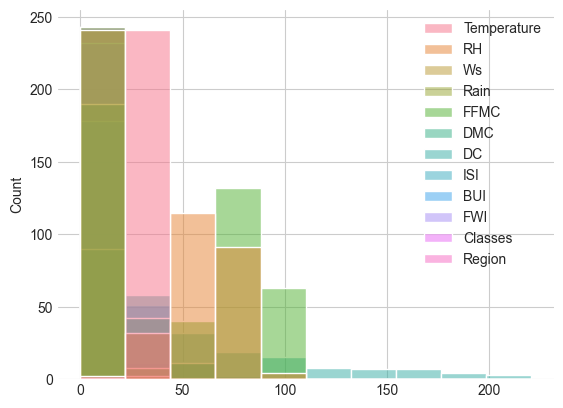

In [831]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_copy, bins=10, kde=False)
plt.show()


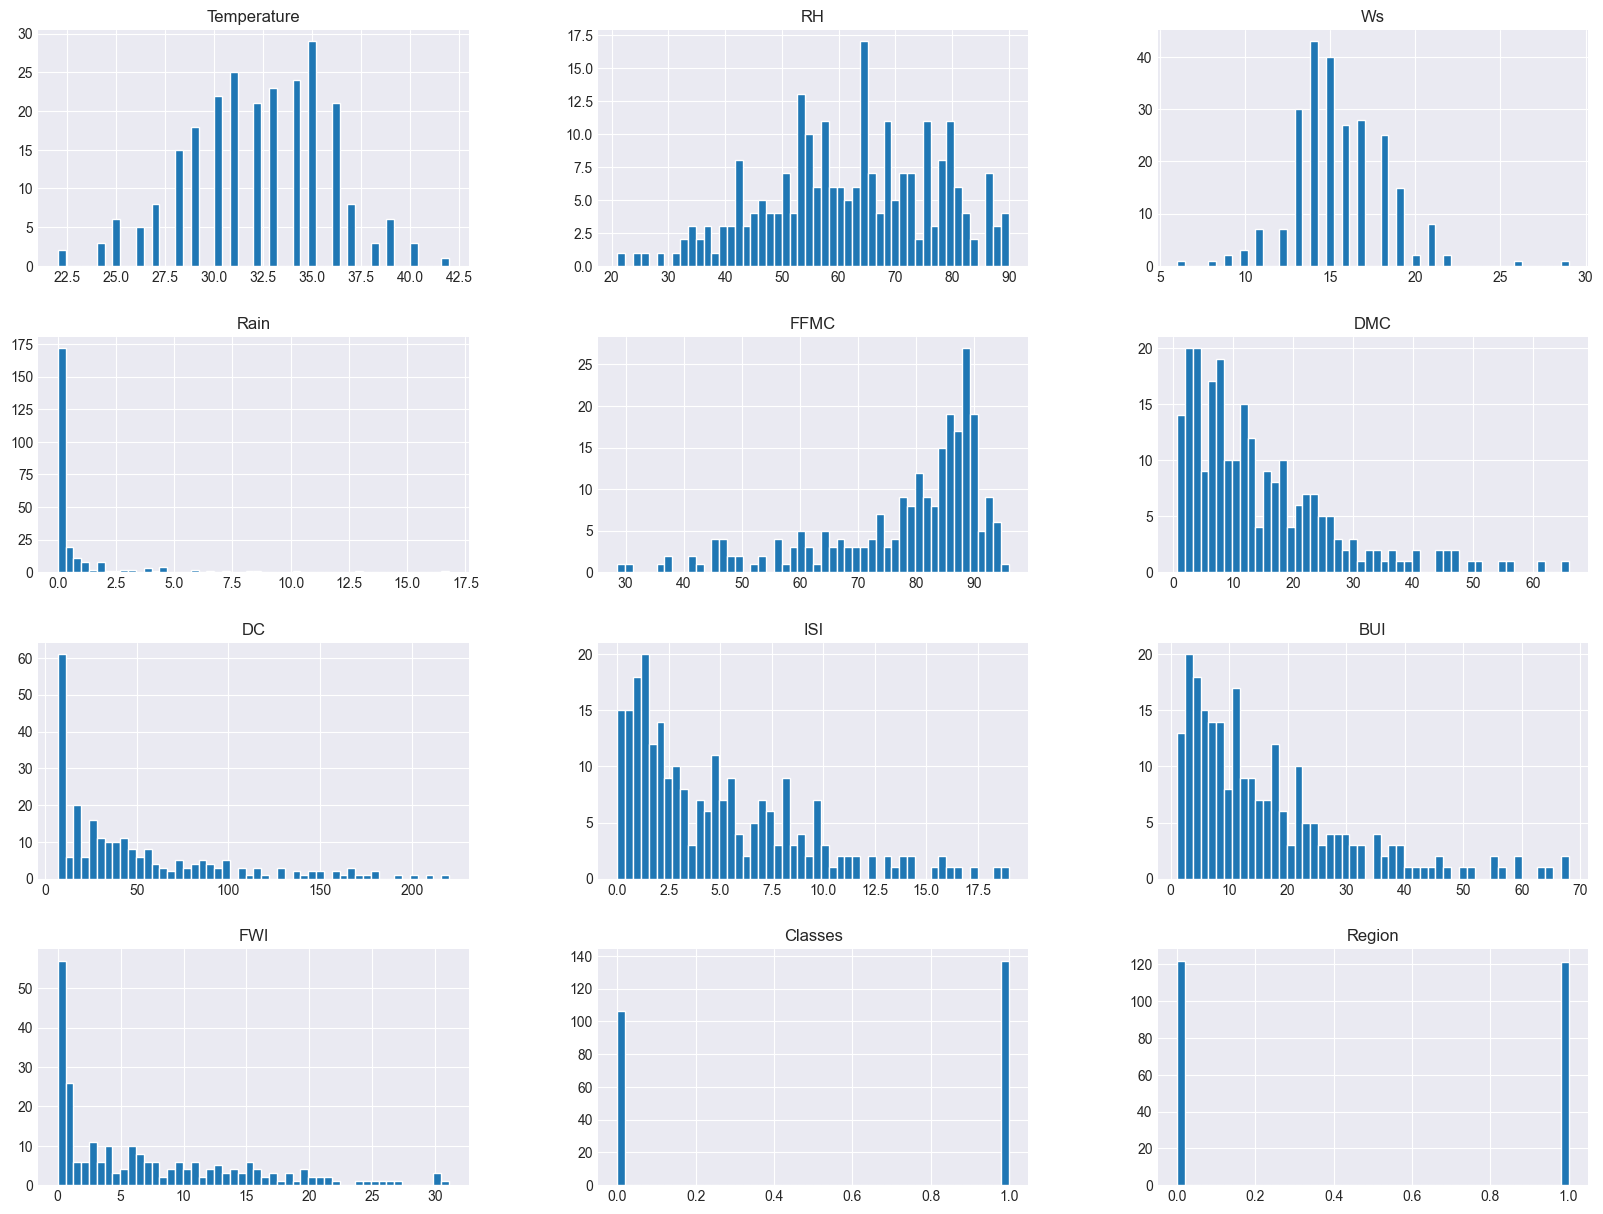

In [832]:
plt.style.use('seaborn-v0_8-dark')  
df_copy.hist(bins=50, figsize=(20, 15))
plt.show()


In [833]:
percentage=df_copy['Classes'].value_counts(normalize = True)*100

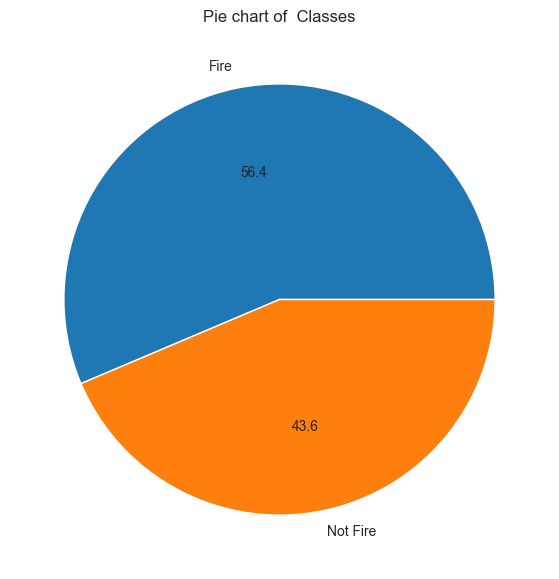

In [834]:
# plotting piechart

classlabels = ["Fire","Not Fire"]
plt.figure(figsize = (12,7))
plt.pie(percentage, labels=classlabels, autopct = '%1.1f' )
plt.title("Pie chart of  Classes")
plt.show()

In [835]:
# Correlation
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

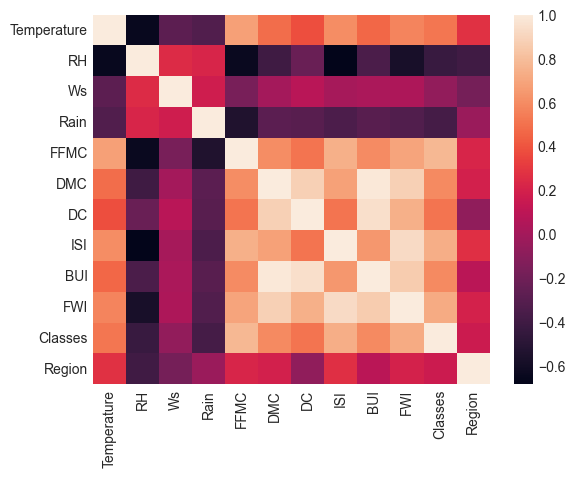

In [836]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

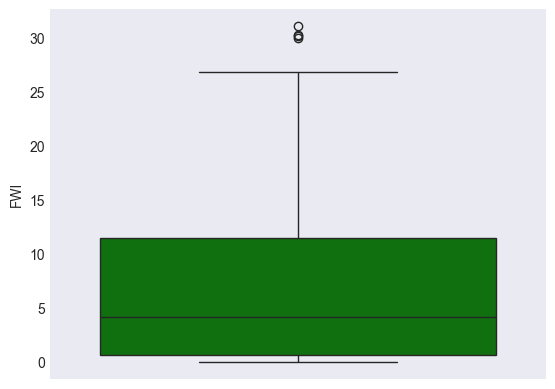

In [837]:
## Box plot 
sns.boxplot(df['FWI'],color = 'green')

In [838]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Text(0.5, 0, 'Months')

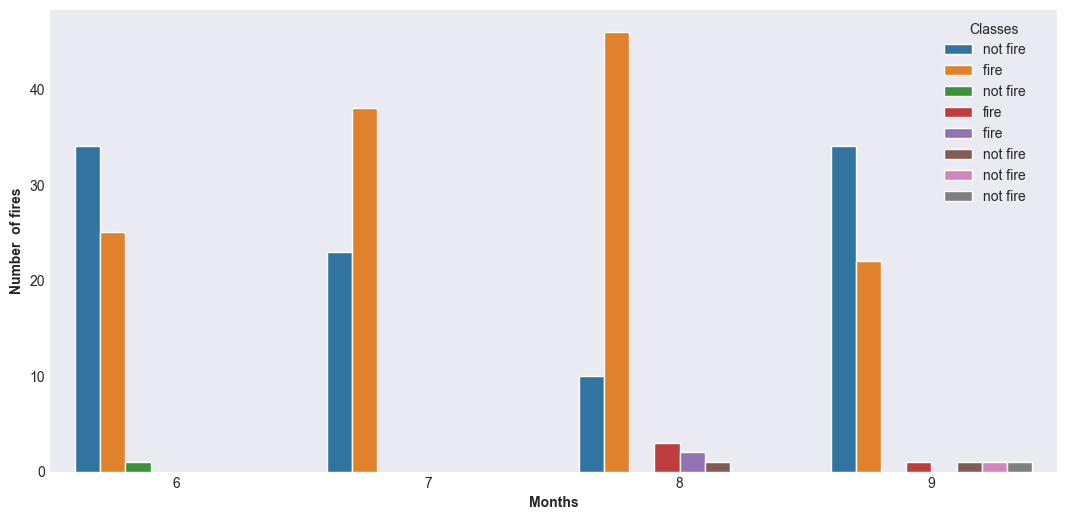

In [839]:
##  Month Fire analysis 

dftemp = df.loc[df['Region'] == 1]

plt.subplots(figsize = (13,6) )
sns.set_style('whitegrid')
sns.countplot(x='month' , hue = 'Classes' , data = df)
plt.ylabel('Number  of fires' , weight = 'bold')
plt.xlabel('Months' , weight = 'bold' )

In [840]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [841]:
df = pd.read_csv("Cleaned_dataset.csv")

In [842]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [843]:
df.columns

Index(['Unnamed: 0', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [844]:
### Drop month,day and year
df.drop(['day' , 'month' , 'year' , 'Unnamed: 0'] , axis = 1, inplace = True)

In [845]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [846]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [847]:
##encoding 


df['Classes']  = np.where(df['Classes'].str.contains("not fire"),0,1)


In [848]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [849]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [850]:
df.shape

(243, 12)

In [851]:
## independent and dependent variables

X  = df.drop('FWI',axis = 1)
y = df ['FWI']

In [852]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [853]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [854]:
#Train and test 
from sklearn.model_selection import train_test_split

X_train,X_test , Y_train,Y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [855]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

In [856]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1
68,32,60,18,0.3,77.1,11.3,47.0,2.2,14.1,0,0
119,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0,0


In [857]:
## feature selection based on correlation 

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

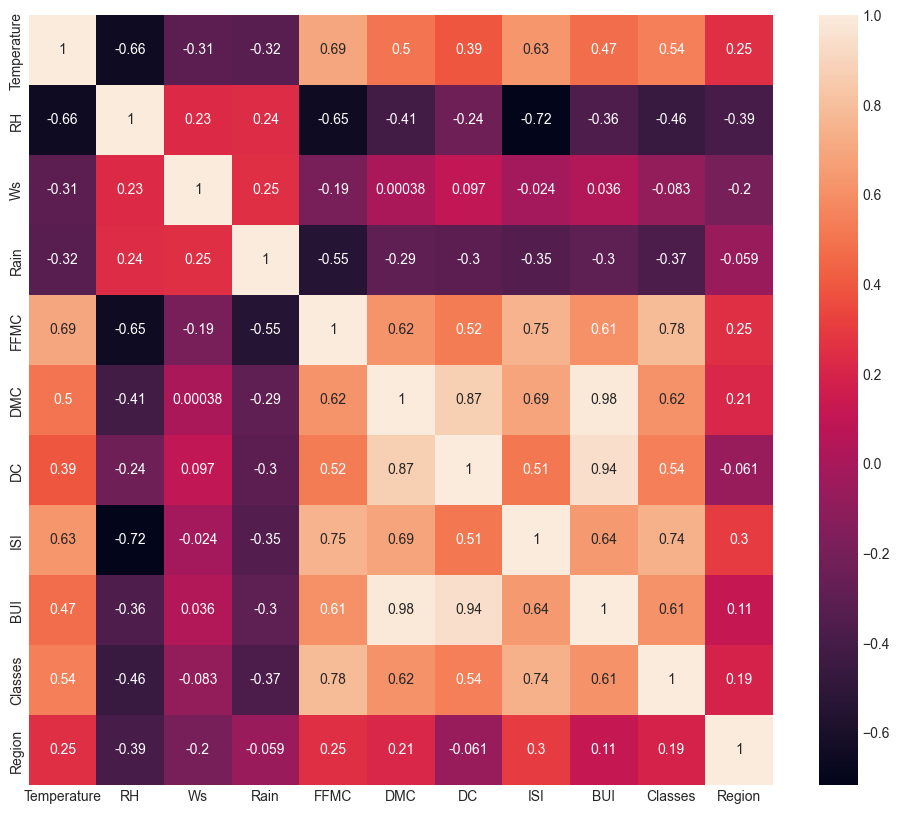

In [858]:
## check for multicollinearity  

plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

In [859]:
def correlation(dataset,threshold) :
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) >  threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    
    return col_corr

In [860]:
correlation(X_train,0.90)

{'BUI'}

In [861]:
corr_features = correlation(X_train,0.85)

In [862]:
## Drop features when correlation is more like than 0.85

X_train.drop(corr_features,axis = 1 , inplace = True)
X_test.drop(corr_features , axis = 1 , inplace = True )
X_train.shape  , X_test.shape

((182, 9), (61, 9))

In [863]:
## Feature engineering

from sklearn.preprocessing  import   StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [864]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

In [865]:
##  Box plot to understand  Effect of  Standard Scaler


Text(0.5, 1.0, 'X_train After Scaling')

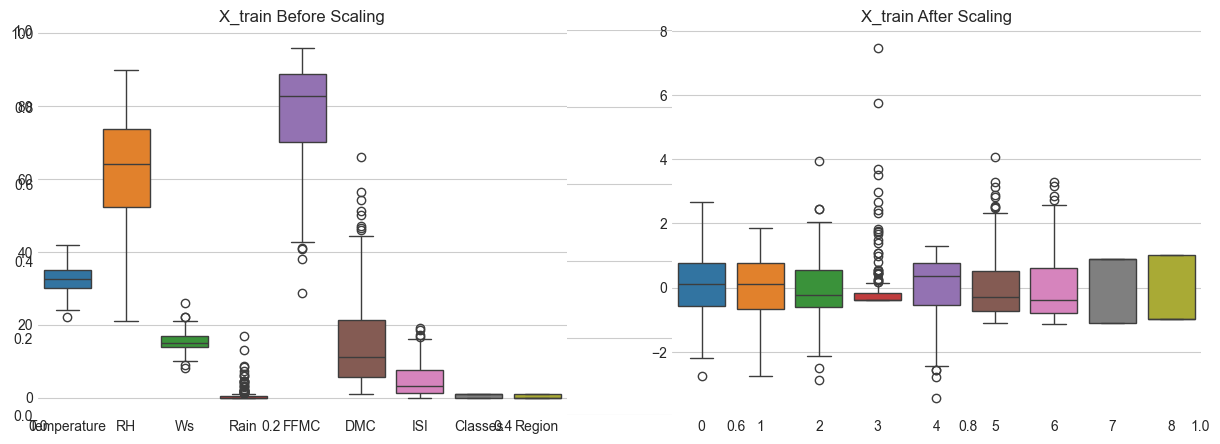

In [866]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

mean_absolute_error 0.5468236465249978
r2_score 0.9847657384266951


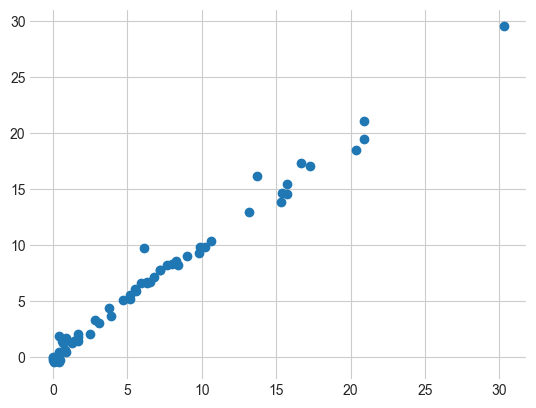

In [878]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,Y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)
plt.scatter(Y_test,y_pred)

mean_absolute_error 1.133175994914409
r2_score 0.9492020263112388


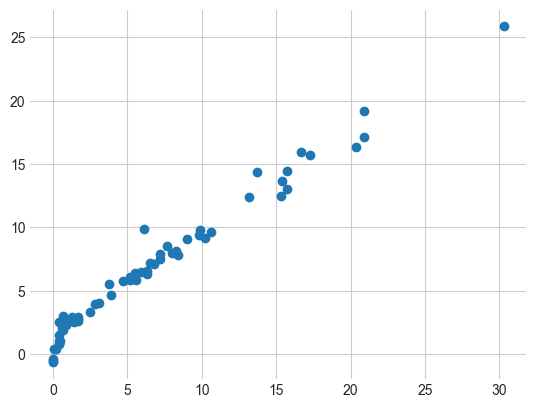

In [879]:
## lasso Regression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)
plt.scatter(Y_test,y_pred)

mean_absolute_error 0.5642305340105715
r2_score 0.9842993364555512


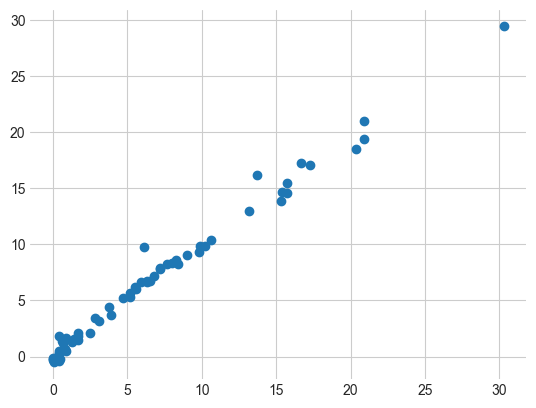

In [880]:
## Ridge Regression 

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)
plt.scatter(Y_test,y_pred)

mean_absolute_error 1.8822353634896005
r2_score 0.8753460589519703


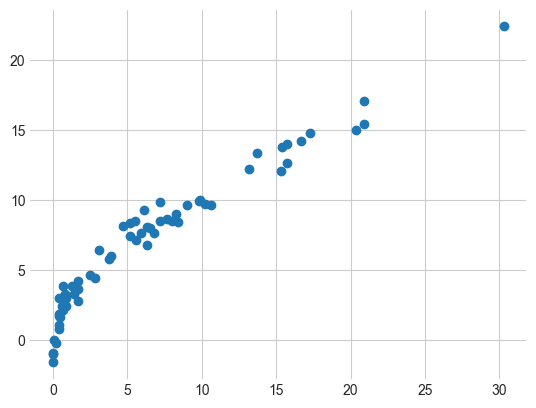

In [881]:
## ElasticNet Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
El = ElasticNet()
El.fit(X_train_scaled,Y_train)
y_pred = El.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)
plt.scatter(Y_test,y_pred)

In [883]:
##  Crosss Validation Lasso 

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled,Y_train)

LassoCV(cv=5)

In [884]:
lassocv.predict(X_test_scaled)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [885]:
lassocv.alpha_

np.float64(0.05725391318234408)

In [886]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [887]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

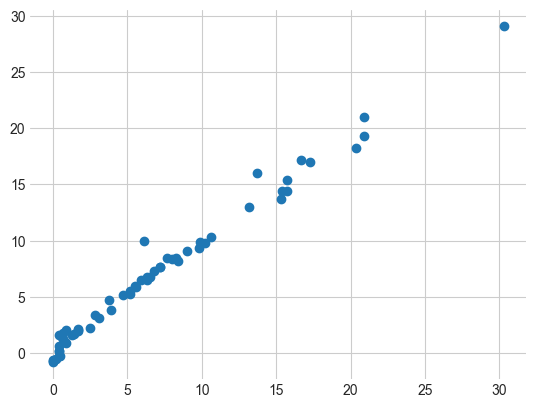

In [891]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)

Mean absolute error 0.5642305340105715
R2 Score 0.8753460589519703


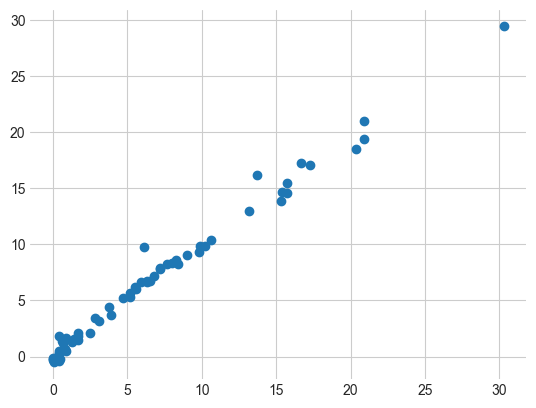

In [893]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(cv = 5)

ridgecv.fit(X_train_scaled, Y_train)
y_pred = ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)

In [894]:
ridgecv.best_score_

np.float64(0.9549267274722453)

In [895]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

mean_absolute_error 0.6575946731430898
r2_score 0.9814217587854941


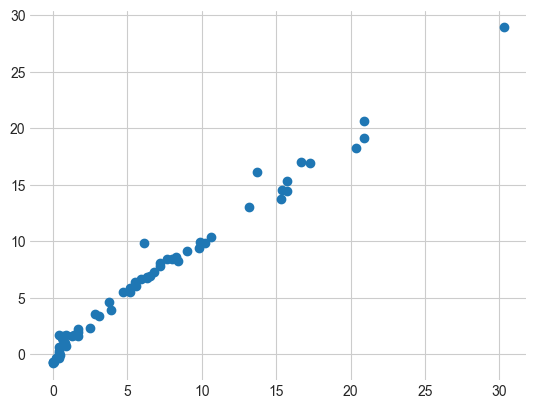

In [896]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Elcv = ElasticNetCV()
Elcv.fit(X_train_scaled,Y_train)
y_pred = Elcv.predict(X_test_scaled)
mae = mean_absolute_error(Y_test,y_pred)
score = r2_score(Y_test,y_pred)
print("mean_absolute_error" , mae)
print("r2_score" , score)
plt.scatter(Y_test,y_pred)

In [901]:
Elcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}